In [98]:
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
import statsmodels.formula.api as smf

from scipy import stats

In [2]:
# def regression(train, test, columns):
#     df_train = train[columns]
#     df_train = sm.add_constant(df_train, prepend=True)
#     df_test = test[columns]
#     df_test = sm.add_constant(df_test, prepend=True)

#     ols = sm.OLS(endog=df_train[columns[-1]], exog=df_train[['const'] + columns[:-1]])
#     model = ols.fit()

#     print(model.summary())

In [3]:
df = pd.read_csv('data/task1/wages.txt', sep = '\t')
df.head()

,GENDER,EDU,AGE,WAGE
0,0,1,19,"10,44"
1,0,1,20,"13,52"
2,0,1,21,"19,12"
3,0,1,25,"20,28"
4,0,1,26,"14,63"


In [4]:
df['WAGE'] = df['WAGE'].apply(lambda x: np.log(float(x.replace(',', '.'))))

In [5]:
# df['AGE'] = df['AGE'].apply(lambda x: np.log(x))

In [6]:
for edu in df['EDU'].unique():
    print(df[df['EDU']==edu].shape)

(24, 4)
(36, 4)
(53, 4)
(25, 4)
(12, 4)


In [7]:
df['EDU'] = df['EDU'].map({1:1, 2:1, 3:2, 4:3, 5:3})

In [8]:
df_copy = df.copy().reset_index()
df_copy

,index,GENDER,EDU,AGE,WAGE
0,0,0,1,19,2.345645
1,1,0,1,20,2.604170
2,2,0,1,21,2.950735
3,3,0,1,25,3.009635
4,4,0,1,26,2.683074
...,...,...,...,...,...
145,145,1,3,59,3.325396
146,146,1,3,59,3.325396
147,147,1,3,27,3.261552
148,148,1,3,37,3.216874


In [9]:
df_copy = df.copy().reset_index()

df1 = pd.get_dummies(df['EDU'], prefix = 'EDU').reset_index()
df_dum = pd.merge(
    left = df_copy,
    right = df1,
    left_on = 'index',
    right_on = 'index',   
)
df_dum.drop(['EDU', 'index'], axis = 1, inplace=True)

In [10]:
df_dum

,GENDER,AGE,WAGE,EDU_1,EDU_2,EDU_3
0,0,19,2.345645,True,False,False
1,0,20,2.604170,True,False,False
2,0,21,2.950735,True,False,False
3,0,25,3.009635,True,False,False
4,0,26,2.683074,True,False,False
...,...,...,...,...,...,...
145,1,59,3.325396,False,False,True
146,1,59,3.325396,False,False,True
147,1,27,3.261552,False,False,True
148,1,37,3.216874,False,False,True


In [11]:
for i in df['EDU'].unique():
    df_dum['EDU_' + str(i)] = df_dum['EDU_' + str(i)].apply(lambda x: int(x))
df_dum

,GENDER,AGE,WAGE,EDU_1,EDU_2,EDU_3
0,0,19,2.345645,1,0,0
1,0,20,2.604170,1,0,0
2,0,21,2.950735,1,0,0
3,0,25,3.009635,1,0,0
4,0,26,2.683074,1,0,0
...,...,...,...,...,...,...
145,1,59,3.325396,0,0,1
146,1,59,3.325396,0,0,1
147,1,27,3.261552,0,0,1
148,1,37,3.216874,0,0,1


In [12]:
edu_cols = ['EDU_1', 'EDU_2', 'EDU_3']

In [13]:
df_train, df_test= train_test_split(df_dum, test_size=0.3, random_state=42)

In [14]:
df_train

,GENDER,AGE,WAGE,EDU_1,EDU_2,EDU_3
81,1,23,2.579459,1,0,0
133,1,24,2.769459,0,0,1
137,1,31,3.302481,0,0,1
75,1,17,1.851599,1,0,0
109,1,23,2.978586,0,1,0
...,...,...,...,...,...,...
71,0,49,3.562466,0,0,1
106,1,55,2.917771,1,0,0
14,0,20,2.650421,1,0,0
92,1,22,2.209373,1,0,0


Проверка гипотезы о равенстве средних зарплат



In [15]:
df_men = df[df['GENDER'] == 0].copy()
df_women = df[df['GENDER'] == 1].copy()
df_men.shape, df_women.shape

((75, 4), (75, 4))

In [16]:
def t_test (list_1, list_2, alpha):
  t_value, p_value = stats.ttest_ind(list_1, list_2, equal_var=True)
  print('Test statistic is %f' % float("{:.6f}".format(t_value)))
  print('p-value for two tailed test is %f' % p_value)

  if p_value <= alpha:
  
      print('Учитывая, что p-value(=%f)' % p_value, '< alpha(=%2f)' % alpha, ',' \
              '\n Мы вынуждены отклонить нулевую гипотезу о равенстве средних\
                \n зарплат мужчин и женщин в Голландии в 1997 году\n')
  
  else:
  
      print('Учитывая, что p-value(=%f)' % p_value, '> alpha(=%2f)' % alpha,
            'Мы не имеем оснований отклонить гипотезу о равенстве средних\
              \n зарплат мужчин и женщин в Голландии в 1997 году\n')

In [17]:
for edu in df['EDU'].unique():
    print ('t-тест для уровня образования: ' + str(edu))
    list_men = list(df_men['WAGE'][df_men['EDU'] == edu])
    list_women = list(df_women['WAGE'][df_women['EDU'] == edu])
    t_test(list_men, list_women, alpha = 0.05)

t-тест для уровня образования: 1
Test statistic is 2.729979
p-value for two tailed test is 0.008373
Учитывая, что p-value(=0.008373) < alpha(=0.050000) ,
 Мы вынуждены отклонить нулевую гипотезу о равенстве средних                
 зарплат мужчин и женщин в Голландии в 1997 году

t-тест для уровня образования: 2
Test statistic is 2.704224
p-value for two tailed test is 0.009281
Учитывая, что p-value(=0.009281) < alpha(=0.050000) ,
 Мы вынуждены отклонить нулевую гипотезу о равенстве средних                
 зарплат мужчин и женщин в Голландии в 1997 году

t-тест для уровня образования: 3
Test statistic is 2.472638
p-value for two tailed test is 0.018416
Учитывая, что p-value(=0.018416) < alpha(=0.050000) ,
 Мы вынуждены отклонить нулевую гипотезу о равенстве средних                
 зарплат мужчин и женщин в Голландии в 1997 году



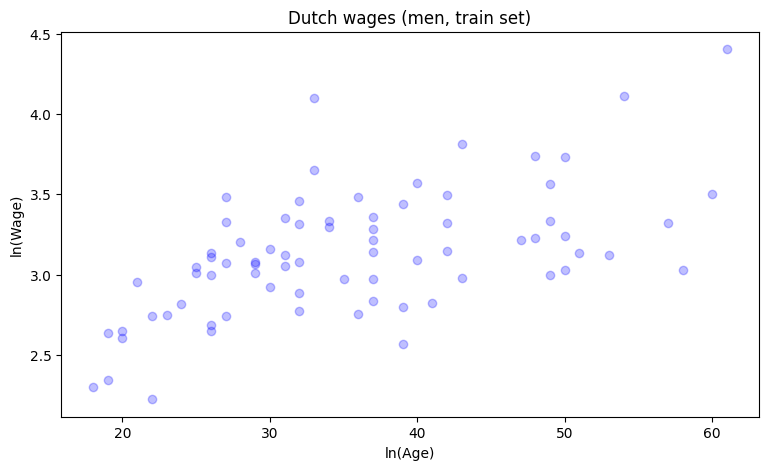

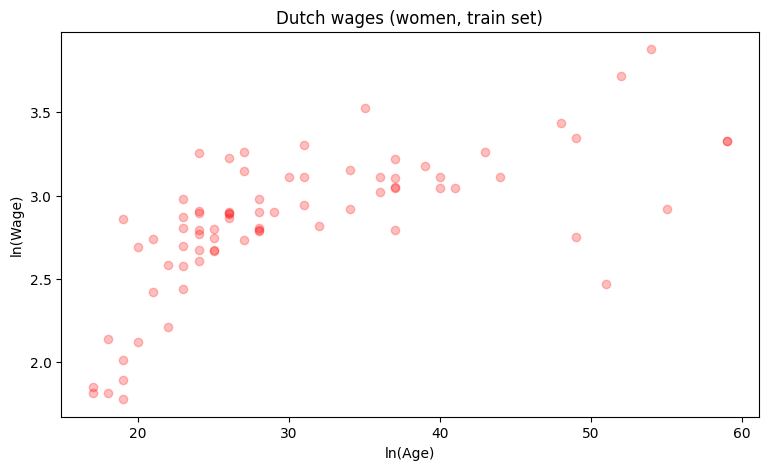

In [18]:
plt.figure(figsize=(9, 5))
plt.scatter(df_men['AGE'], df_men['WAGE'], c='blue', alpha=0.25);
plt.title('Dutch wages (men, train set)');
plt.xlabel('ln(Age)');
plt.ylabel('ln(Wage)');

plt.figure(figsize=(9, 5))
plt.scatter(df_women['AGE'], df_women['WAGE'], c='red', alpha=0.25);
plt.title('Dutch wages (women, train set)');
plt.xlabel('ln(Age)');
plt.ylabel('ln(Wage)');

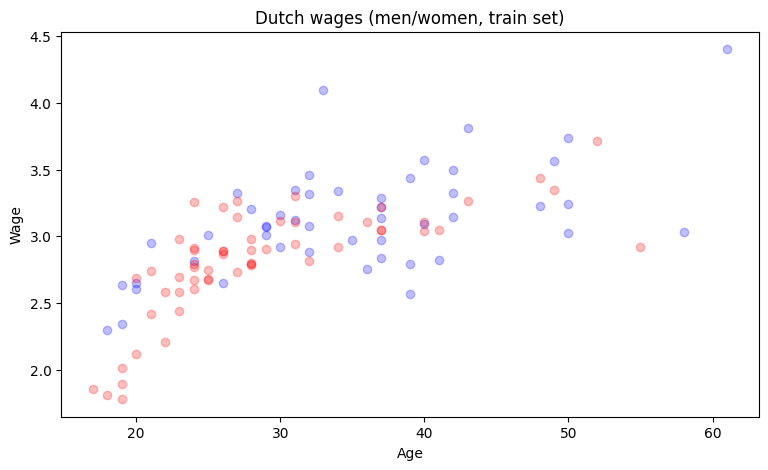

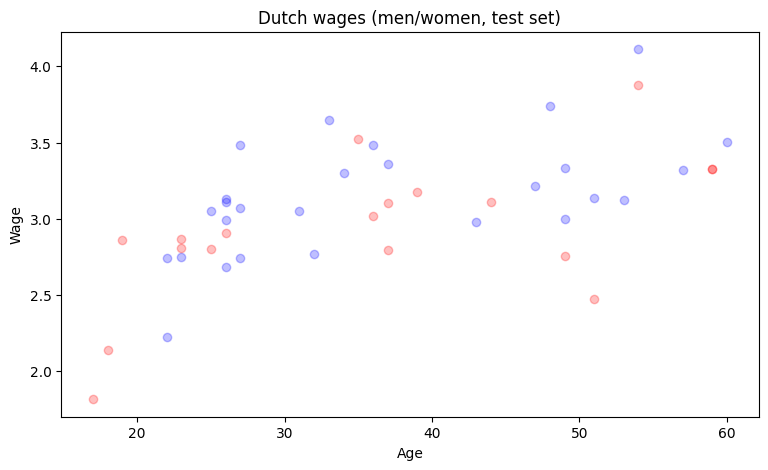

In [19]:
plt.figure(figsize=(9, 5))
plt.scatter(df_train['AGE'][df_train['GENDER'] == 0], df_train['WAGE'][df_train['GENDER'] == 0], c='blue', alpha=0.25);
plt.scatter(df_train['AGE'][df_train['GENDER'] == 1], df_train['WAGE'][df_train['GENDER'] == 1], c='red', alpha=0.25);
plt.title('Dutch wages (men/women, train set)');
plt.xlabel('Age');
plt.ylabel('Wage');

plt.figure(figsize=(9, 5))
plt.scatter(df_test['AGE'][df_test['GENDER'] == 0], df_test['WAGE'][df_test['GENDER'] == 0], c='blue', alpha=0.25);
plt.scatter(df_test['AGE'][df_test['GENDER'] == 1], df_test['WAGE'][df_test['GENDER'] == 1], c='red', alpha=0.25);
plt.title('Dutch wages (men/women, test set)');
plt.xlabel('Age');
plt.ylabel('Wage');

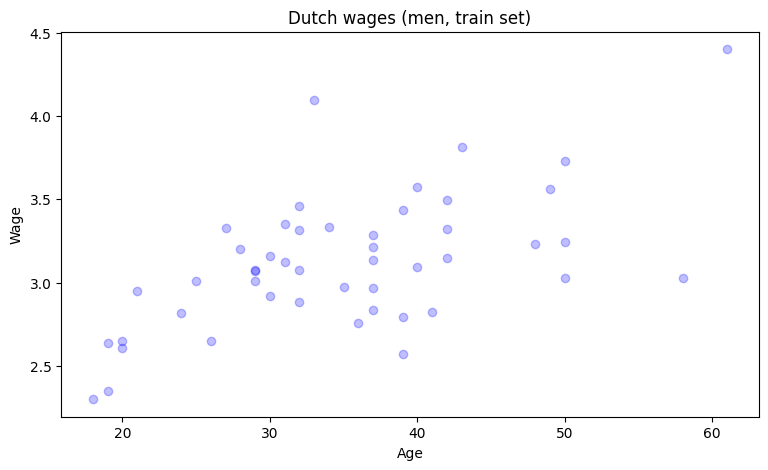

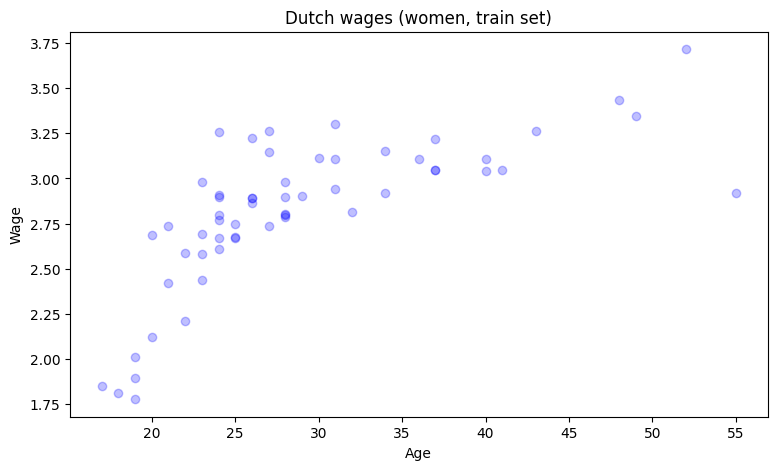

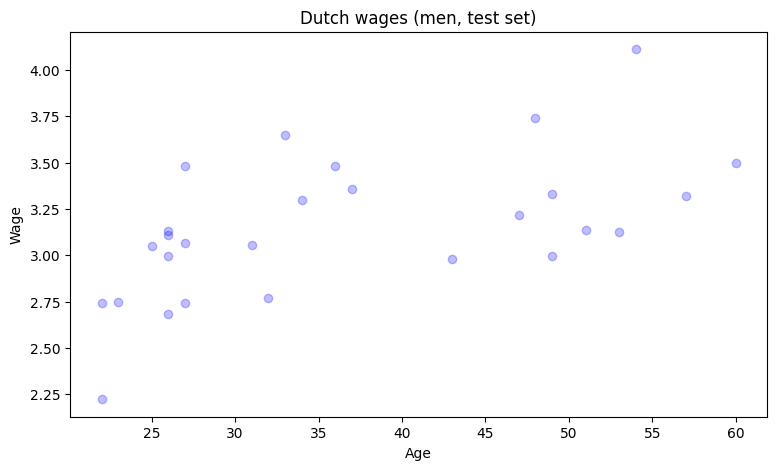

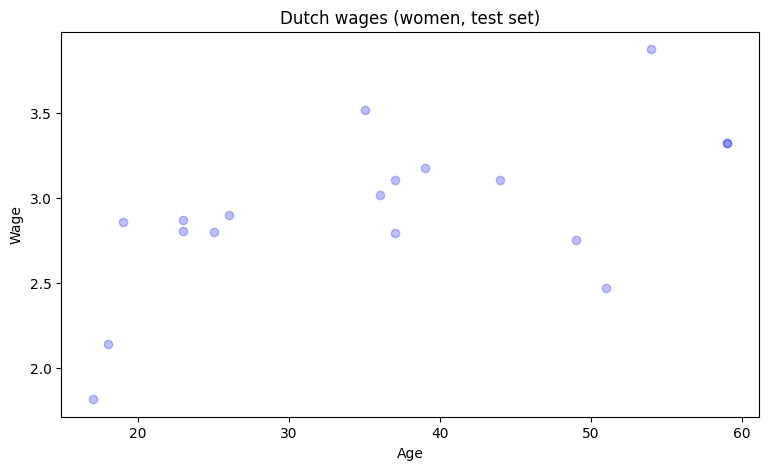

In [20]:
plt.figure(figsize=(9, 5))
plt.scatter(df_train['AGE'][df_train['GENDER'] == 0], df_train['WAGE'][df_train['GENDER'] == 0], c='blue', alpha=0.25);
plt.title('Dutch wages (men, train set)');
plt.xlabel('Age');
plt.ylabel('Wage');

plt.figure(figsize=(9, 5))
plt.scatter(df_train['AGE'][df_train['GENDER'] == 1], df_train['WAGE'][df_train['GENDER'] == 1], c='blue', alpha=0.25);
plt.title('Dutch wages (women, train set)');
plt.xlabel('Age');
plt.ylabel('Wage');

plt.figure(figsize=(9, 5))
plt.scatter(df_test['AGE'][df_test['GENDER'] == 0], df_test['WAGE'][df_test['GENDER'] == 0], c='blue', alpha=0.25);
plt.title('Dutch wages (men, test set)');
plt.xlabel('Age');
plt.ylabel('Wage');

plt.figure(figsize=(9, 5))
plt.scatter(df_test['AGE'][df_test['GENDER'] == 1], df_test['WAGE'][df_test['GENDER'] == 1], c='blue', alpha=0.25);
plt.title('Dutch wages (women, test set)');
plt.xlabel('Age');
plt.ylabel('Wage');

df

In [21]:
df_train = sm.add_constant(df_train, prepend=True)
df_train.head(3)
df_test = sm.add_constant(df_test, prepend=True)
df_test.head(3)

,const,GENDER,AGE,WAGE,EDU_1,EDU_2,EDU_3
73,1.0,0,54,4.112184,0,0,1
18,1.0,0,25,3.049273,1,0,0
118,1.0,1,26,2.904165,0,1,0


In [22]:
df_train['AGE**2'] = df_train['AGE']**2
df_test['AGE**2'] = df_test['AGE']**2

In [23]:
mod = smf.ols(formula='WAGE ~ GENDER + AGE + I(AGE**2) + C(EDU)', data=df)
model = mod.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   WAGE   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     44.21
Date:                Wed, 22 Jan 2025   Prob (F-statistic):           1.85e-27
Time:                        21:17:23   Log-Likelihood:                -17.648
No. Observations:                 150   AIC:                             47.30
Df Residuals:                     144   BIC:                             65.36
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.4995      0.249      6.021      

In [24]:
ols = sm.OLS(endog=df_train['WAGE'], exog=df_train[['const', 'GENDER', 'AGE', 'AGE**2', 'EDU_2', 'EDU_3']])
model = ols.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   WAGE   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.595
Method:                 Least Squares   F-statistic:                     31.59
Date:                Wed, 22 Jan 2025   Prob (F-statistic):           4.20e-19
Time:                        21:17:23   Log-Likelihood:                -10.855
No. Observations:                 105   AIC:                             33.71
Df Residuals:                      99   BIC:                             49.63
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3204      0.302      4.367      0.0

In [25]:
coef = model.params

In [26]:
((-1 * model.params['AGE'])/(2 * model.params['AGE**2']))

np.float64(54.19583944676105)

In [27]:
y_test_fitted = model.predict(df_test[['const', 'GENDER', 'AGE', 'AGE**2', 'EDU_2', 'EDU_3']])

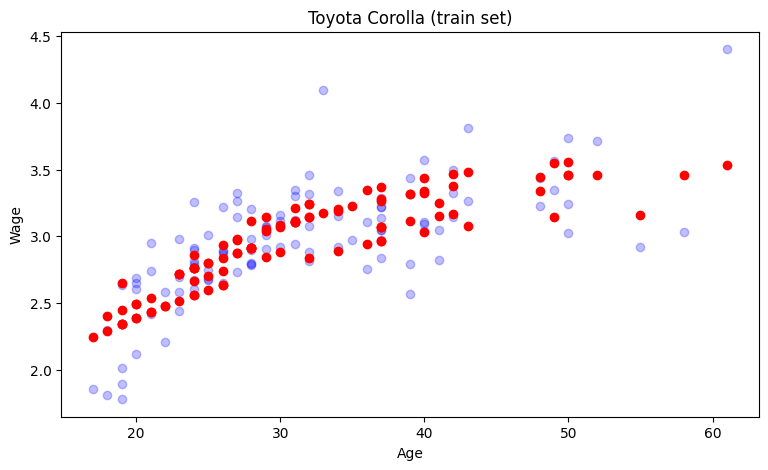

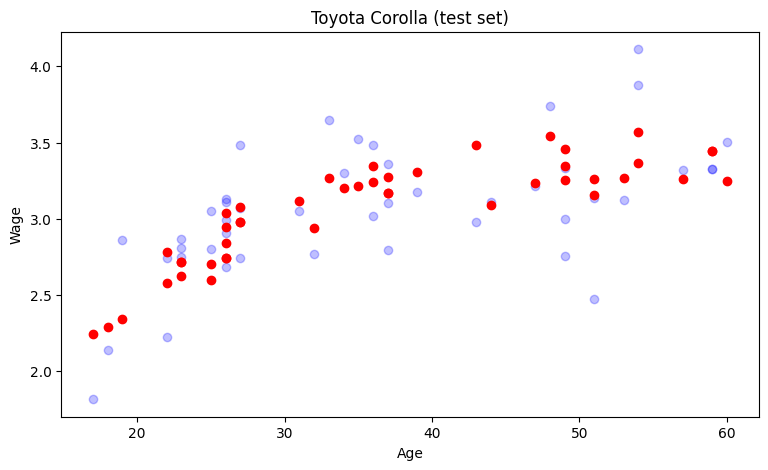

In [28]:
plt.figure(figsize=(9, 5))
plt.scatter(df_train['AGE'], df_train['WAGE'], c='blue', alpha=0.25);
plt.scatter(df_train['AGE'], model.fittedvalues, c='red');
plt.title('Toyota Corolla (train set)');
plt.xlabel('Age');
plt.ylabel('Wage');

# Строим диаграмму рассеяния + прогноз на тестовом наборе данных.

plt.figure(figsize=(9, 5))
plt.scatter(df_test['AGE'], df_test['WAGE'], c='blue', alpha=0.25);
plt.scatter(df_test['AGE'], y_test_fitted, c='red');
plt.title('Toyota Corolla (test set)');
plt.xlabel('Age');
plt.ylabel('Wage');

df_men

In [29]:
df_dum_men = df_dum[df['GENDER'] == 0].copy()

In [30]:
df_men_train, df_men_test= train_test_split(df_dum_men, test_size=0.3, random_state=42)

In [31]:
df_men_train = sm.add_constant(df_men_train, prepend=True)
df_men_test = sm.add_constant(df_men_test, prepend=True)
df_men_test.head(3)

,const,GENDER,AGE,WAGE,EDU_1,EDU_2,EDU_3
4,1.0,0,26,2.683074,1,0,0
63,1.0,0,42,3.493473,0,0,1
10,1.0,0,49,3.332919,1,0,0


In [32]:
mod = smf.ols(formula='WAGE ~  AGE + C(EDU) ', data=df_men)
model = mod.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   WAGE   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.488
Method:                 Least Squares   F-statistic:                     24.51
Date:                Wed, 22 Jan 2025   Prob (F-statistic):           5.41e-11
Time:                        21:17:24   Log-Likelihood:                -9.7318
No. Observations:                  75   AIC:                             27.46
Df Residuals:                      71   BIC:                             36.73
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.3023      0.117     19.685      

In [33]:
ols = sm.OLS(endog=df_men_train['WAGE'], exog=df_men_train[['const', 'AGE', 'EDU_1', 'EDU_2']])
model = ols.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   WAGE   R-squared:                       0.573
Model:                            OLS   Adj. R-squared:                  0.546
Method:                 Least Squares   F-statistic:                     21.46
Date:                Wed, 22 Jan 2025   Prob (F-statistic):           5.85e-09
Time:                        21:17:24   Log-Likelihood:                -5.0729
No. Observations:                  52   AIC:                             18.15
Df Residuals:                      48   BIC:                             25.95
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6924      0.160     16.870      0.0

In [34]:
y_test_fitted = model.predict(df_men_test[['const', 'AGE', 'EDU_1', 'EDU_2']])

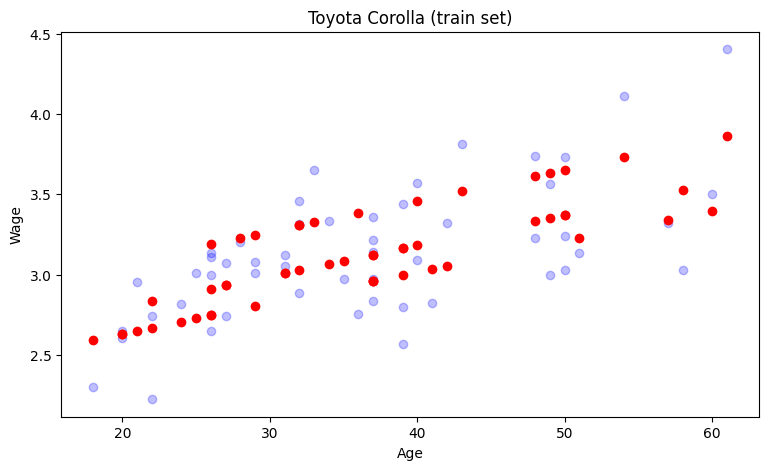

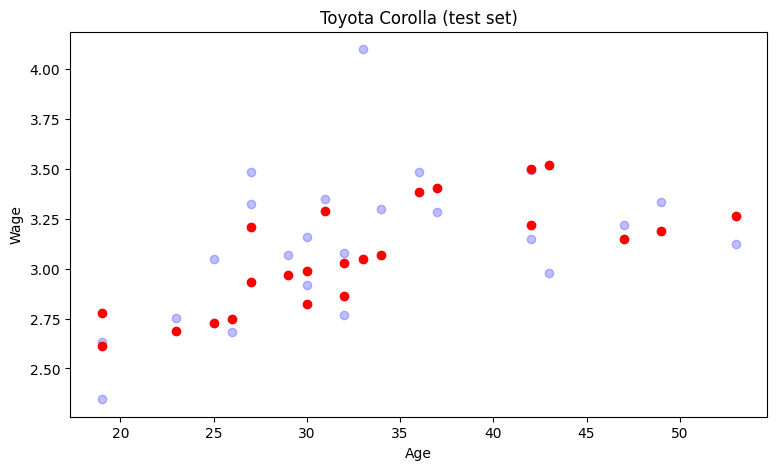

In [35]:
plt.figure(figsize=(9, 5))
plt.scatter(df_men_train['AGE'], df_men_train['WAGE'], c='blue', alpha=0.25);
plt.scatter(df_men_train['AGE'], model.fittedvalues, c='red');
plt.title('Toyota Corolla (train set)');
plt.xlabel('Age');
plt.ylabel('Wage');

# Строим диаграмму рассеяния + прогноз на тестовом наборе данных.

plt.figure(figsize=(9, 5))
plt.scatter(df_men_test['AGE'], df_men_test['WAGE'], c='blue', alpha=0.25);
plt.scatter(df_men_test['AGE'], y_test_fitted, c='red');
plt.title('Toyota Corolla (test set)');
plt.xlabel('Age');
plt.ylabel('Wage');

df_women

In [36]:
df_dum_women = df_dum[df['GENDER'] == 1].copy()

In [64]:
df_dum_women['AGE**0.5'] = df_dum_women['AGE']**0.5

In [38]:
df_women_train, df_women_test= train_test_split(df_dum_women, test_size=0.3, random_state=42)

In [39]:
df_women_train = sm.add_constant(df_women_train, prepend=True, has_constant='add')
df_women_test = sm.add_constant(df_women_test, prepend=True, has_constant='add')
df_women_train.head(3)

,const,GENDER,AGE,WAGE,EDU_1,EDU_2,EDU_3,AGE**0.5
119,1.0,1,26,3.222071,0,1,0,5.099020
120,1.0,1,27,3.144152,0,1,0,5.196152
105,1.0,1,49,3.347445,1,0,0,7.000000


In [65]:
mod = smf.ols(formula='WAGE ~ AGE + I(AGE**0.5) + C(EDU)', data=df_women)
model = mod.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   WAGE   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     35.24
Date:                Wed, 22 Jan 2025   Prob (F-statistic):           4.14e-16
Time:                        21:24:21   Log-Likelihood:               -0.69261
No. Observations:                  75   AIC:                             11.39
Df Residuals:                      70   BIC:                             22.97
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -3.5937      1.160     -3.099

In [41]:
ols = sm.OLS(endog=df_women_train['WAGE'], exog=df_women_train[['const', 'AGE', 'AGE**0.5', 'EDU_2', 'EDU_3']])
model = ols.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   WAGE   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     27.33
Date:                Wed, 22 Jan 2025   Prob (F-statistic):           9.47e-12
Time:                        21:17:24   Log-Likelihood:                 2.3915
No. Observations:                  52   AIC:                             5.217
Df Residuals:                      47   BIC:                             14.97
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.7844      1.282     -2.172      0.0

In [42]:
((-1 * model.params['AGE**0.5'])/(2 * model.params['AGE']))**2

np.float64(53.007283190391256)

In [43]:
y_test_fitted = model.predict(df_women_test[['const', 'AGE', 'AGE**0.5', 'EDU_2', 'EDU_3']])

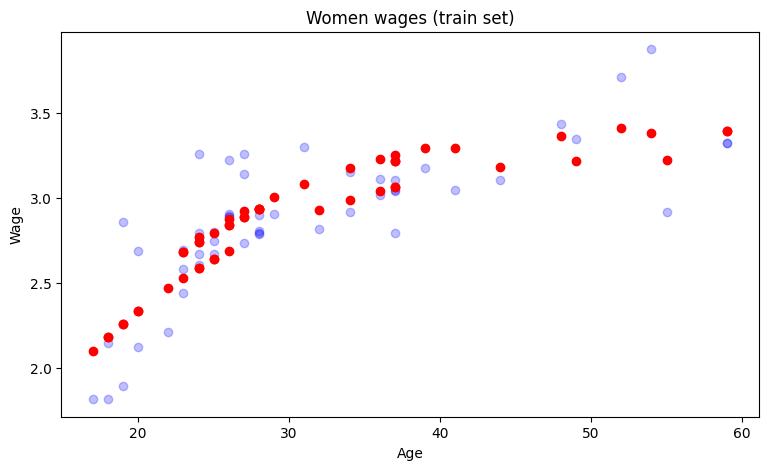

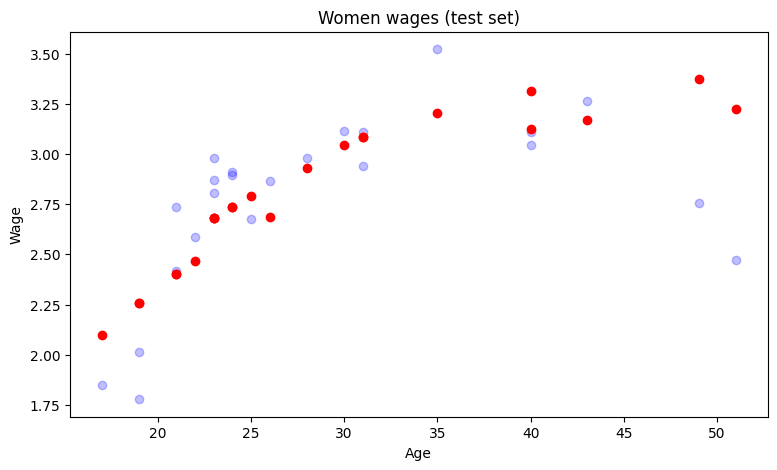

In [44]:
plt.figure(figsize=(9, 5))
plt.scatter(df_women_train['AGE'], df_women_train['WAGE'], c='blue', alpha=0.25);
plt.scatter(df_women_train['AGE'], model.fittedvalues, c='red');
plt.title('Women wages (train set)');
plt.xlabel('Age');
plt.ylabel('Wage');

# Строим диаграмму рассеяния + прогноз на тестовом наборе данных.

plt.figure(figsize=(9, 5))
plt.scatter(df_women_test['AGE'], df_women_test['WAGE'], c='blue', alpha=0.25);
plt.scatter(df_women_test['AGE'], y_test_fitted, c='red');
plt.title('Women wages (test set)');
plt.xlabel('Age');
plt.ylabel('Wage');

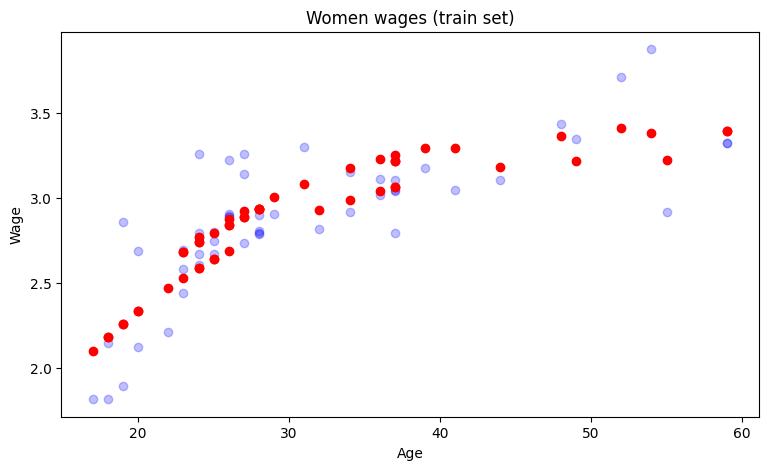

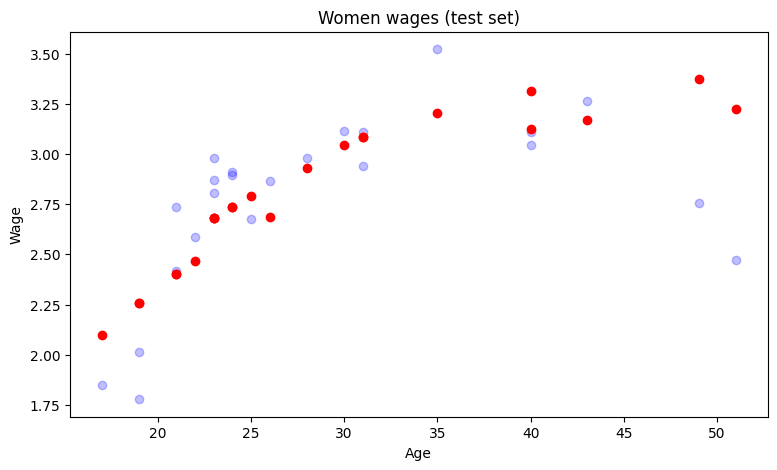

In [ ]:
plt.figure(figsize=(9, 5))
plt.scatter(df_women_train['AGE'], df_women_train['WAGE'], c='blue', alpha=0.25);
plt.scatter(df_women_train['AGE'], model.fittedvalues, c='red');
plt.title('Women wages (train set)');
plt.xlabel('Age');
plt.ylabel('Wage');

# Строим диаграмму рассеяния + прогноз на тестовом наборе данных.

plt.figure(figsize=(9, 5))
plt.scatter(df_women_test['AGE'], df_women_test['WAGE'], c='blue', alpha=0.25);
plt.scatter(df_women_test['AGE'], y_test_fitted, c='red');
plt.title('Women wages (test set)');
plt.xlabel('Age');
plt.ylabel('Wage');

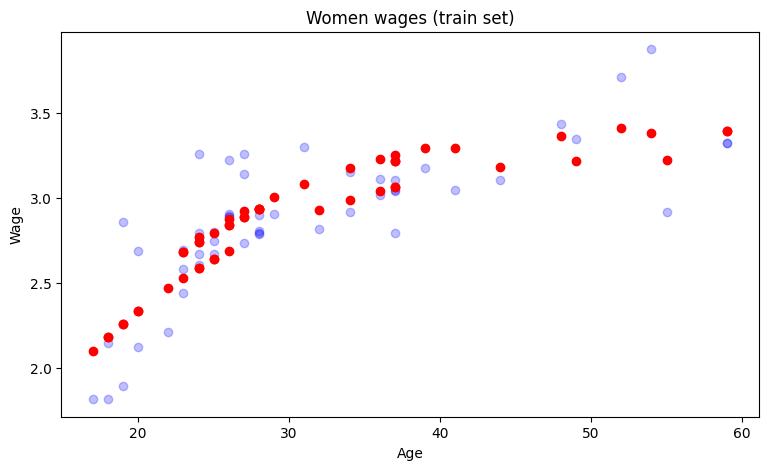

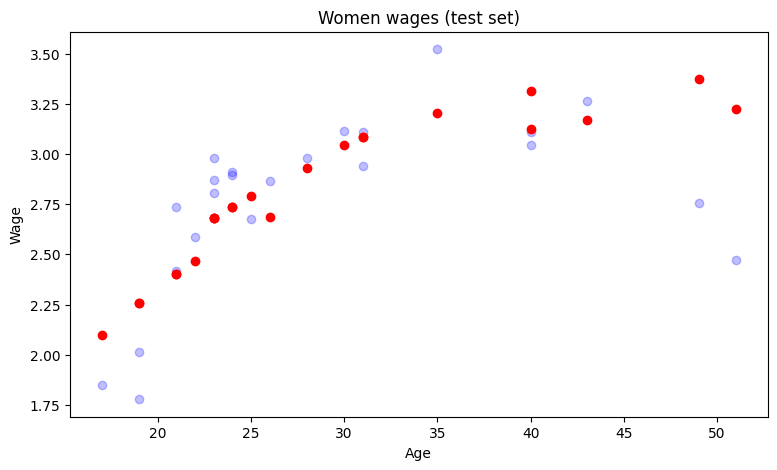

In [ ]:
plt.figure(figsize=(9, 5))
plt.scatter(df_women_train['AGE'], df_women_train['WAGE'], c='blue', alpha=0.25);
plt.scatter(df_women_train['AGE'], model.fittedvalues, c='red');
plt.title('Women wages (train set)');
plt.xlabel('Age');
plt.ylabel('Wage');

# Строим диаграмму рассеяния + прогноз на тестовом наборе данных.

plt.figure(figsize=(9, 5))
plt.scatter(df_women_test['AGE'], df_women_test['WAGE'], c='blue', alpha=0.25);
plt.scatter(df_women_test['AGE'], y_test_fitted, c='red');
plt.title('Women wages (test set)');
plt.xlabel('Age');
plt.ylabel('Wage');

In [45]:
mod = smf.ols(formula='WAGE ~ AGE + I(AGE**2) + C(EDU)', data=df_women)
model = mod.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   WAGE   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     32.23
Date:                Wed, 22 Jan 2025   Prob (F-statistic):           3.15e-15
Time:                        21:17:24   Log-Likelihood:                -2.8977
No. Observations:                  75   AIC:                             15.80
Df Residuals:                      70   BIC:                             27.38
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.7163      0.310      2.307      

In [46]:
mod = smf.ols(formula='WAGE ~ AGE + I(AGE**0.5) + EDU_2 + EDU_3', data=df_women_train)
model = mod.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   WAGE   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     27.33
Date:                Wed, 22 Jan 2025   Prob (F-statistic):           9.47e-12
Time:                        21:17:24   Log-Likelihood:                 2.3915
No. Observations:                  52   AIC:                             5.217
Df Residuals:                      47   BIC:                             14.97
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -2.7844      1.282     -2.172

In [59]:
df_w = df[df['GENDER'] == 1]
df_w

,GENDER,EDU,AGE,WAGE
75,1,1,17,1.851599
76,1,1,18,2.142416
77,1,1,18,1.813195
78,1,1,19,2.858766
79,1,1,19,2.012233
...,...,...,...,...
145,1,3,59,3.325396
146,1,3,59,3.325396
147,1,3,27,3.261552
148,1,3,37,3.216874


In [83]:
df_w['AGE*EDU'] = df_w['AGE']*df_w['EDU']
df_w['AGE**0.5'] = df_w['AGE']**0.5
df_w

C:\Users\User\AppData\Local\Temp\ipykernel_6452\3587206984.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_w['AGE*EDU'] = df_w['AGE']*df_w['EDU']
C:\Users\User\AppData\Local\Temp\ipykernel_6452\3587206984.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_w['AGE**0.5'] = df_w['AGE']**0.5


,GENDER,EDU,AGE,WAGE,AGE*EDU,AGE**0.5
75,1,1,17,1.851599,17,4.123106
76,1,1,18,2.142416,18,4.242641
77,1,1,18,1.813195,18,4.242641
78,1,1,19,2.858766,19,4.358899
79,1,1,19,2.012233,19,4.358899
...,...,...,...,...,...,...
145,1,3,59,3.325396,177,7.681146
146,1,3,59,3.325396,177,7.681146
147,1,3,27,3.261552,81,5.196152
148,1,3,37,3.216874,111,6.082763


In [84]:
df_w_train, df_w_test= train_test_split(df_w, test_size=0.3, random_state=42)

In [85]:
df_w_train = sm.add_constant(df_w_train, prepend=True, has_constant='add')
df_w_test = sm.add_constant(df_w_test, prepend=True, has_constant='add')
df_w_train.head(3)

,const,GENDER,EDU,AGE,WAGE,AGE*EDU,AGE**0.5
119,1.0,1,2,26,3.222071,52,5.099020
120,1.0,1,2,27,3.144152,54,5.196152
105,1.0,1,1,49,3.347445,49,7.000000


In [86]:
mod = smf.ols(formula='WAGE ~ I(AGE*EDU) + I(AGE**0.5) + AGE', data=df_w)
model = mod.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   WAGE   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     46.64
Date:                Wed, 22 Jan 2025   Prob (F-statistic):           9.09e-17
Time:                        21:32:14   Log-Likelihood:                -1.2329
No. Observations:                  75   AIC:                             10.47
Df Residuals:                      71   BIC:                             19.74
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -4.3791      1.104     -3.965

In [87]:
ols = sm.OLS(endog=df_w_train['WAGE'], exog=df_w_train[['const', 'AGE', 'AGE**0.5', 'AGE*EDU']])
model = ols.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   WAGE   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     36.06
Date:                Wed, 22 Jan 2025   Prob (F-statistic):           2.38e-12
Time:                        21:32:15   Log-Likelihood:                 1.8205
No. Observations:                  52   AIC:                             4.359
Df Residuals:                      48   BIC:                             12.16
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.4958      1.230     -2.842      0.0

In [100]:
coef = model.params
coef

const      -3.495760
AGE        -0.142044
AGE**0.5    1.931997
AGE*EDU     0.002635
dtype: float64

In [93]:
agemax_w =[]
for i in range (1,6):
    agemax_w.append(((-1 * model.params['AGE**0.5'])/(2 * (model.params['AGE'] + model.params['AGE*EDU']*i)))**2)

In [94]:
y_test_fitted = model.predict(df_w_test[['const', 'AGE', 'AGE**0.5', 'AGE*EDU']])

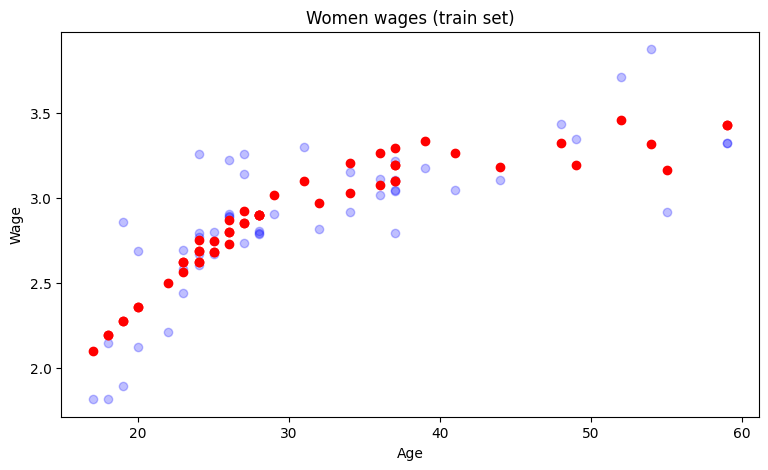

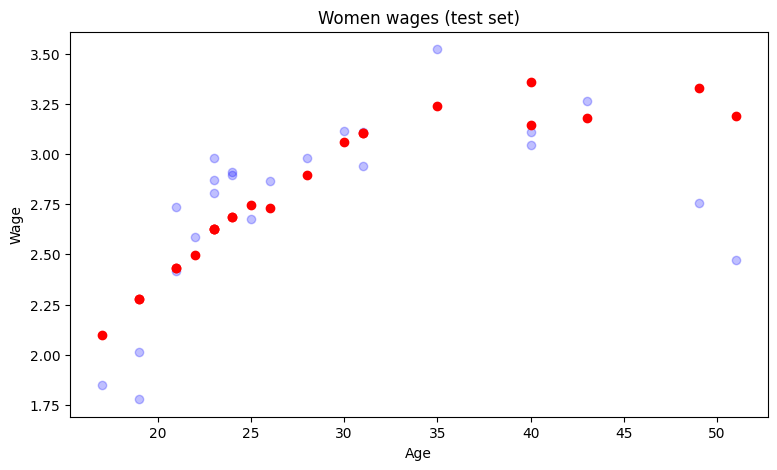

In [96]:
plt.figure(figsize=(9, 5))
plt.scatter(df_w_train['AGE'], df_w_train['WAGE'], c='blue', alpha=0.25);
plt.scatter(df_w_train['AGE'], model.fittedvalues, c='red');
plt.title('Women wages (train set)');
plt.xlabel('Age');
plt.ylabel('Wage');

# Строим диаграмму рассеяния + прогноз на тестовом наборе данных.

plt.figure(figsize=(9, 5))
plt.scatter(df_w_test['AGE'], df_w_test['WAGE'], c='blue', alpha=0.25);
plt.scatter(df_w_test['AGE'], y_test_fitted, c='red');
plt.title('Women wages (test set)');
plt.xlabel('Age');
plt.ylabel('Wage');

In [102]:
for edu in range(1,6):
    for age in agemax_w:
        wage = math.exp(coef[0] + coef[1]*age + coef[2]*age**0.5 + coef[3]*age*edu)
        print(f'Максимальная зарплата женщины (уровня образования: {edu}) достигается в {age} и составляет: {wage}')

Максимальная зарплата женщины (уровня образования: 1) достигается в 48.01460367574307 и составляет: 24.48083969962872
Максимальная зарплата женщины (уровня образования: 1) достигается в 49.88282190906662 и составляет: 24.42007239983983
Максимальная зарплата женщины (уровня образования: 1) достигается в 51.86223666769307 и составляет: 24.22911416331059
Максимальная зарплата женщины (уровня образования: 1) достигается в 53.96185083833387 и составляет: 23.89558605872845
Максимальная зарплата женщины (уровня образования: 1) достигается в 56.191597232107924 и составляет: 23.408433819025635
Максимальная зарплата женщины (уровня образования: 2) достигается в 48.01460367574307 и составляет: 27.783231130876917
Максимальная зарплата женщины (уровня образования: 2) достигается в 49.88282190906662 и составляет: 27.851058770495154
Максимальная зарплата женщины (уровня образования: 2) достигается в 51.86223666769307 и составляет: 27.77780294163317
Максимальная зарплата женщины (уровня образования: 2

C:\Users\User\AppData\Local\Temp\ipykernel_6452\4087846301.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  wage = math.exp(coef[0] + coef[1]*age + coef[2]*age**0.5 + coef[3]*age*edu)
